<a href="https://colab.research.google.com/github/HadisZare12/Fashion-MNIST/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [7]:
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [8]:
#MNIST dataset
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()

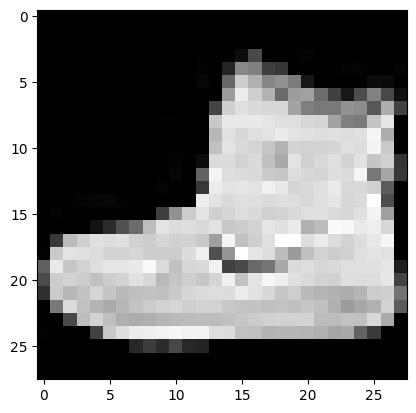

In [9]:
#display an image from the dataset
plt.imshow(train_images[0],cmap="gray")
plt.show()

In [10]:
print(train_labels[0])

9


class_names = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [11]:
#normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
#Reshape images to specify that its a single channel
train_images = train_images.reshape((train_images.shape[0],28,28,1))
test_images = test_images.reshape((test_images.shape[0],28,28,1))

Convolutional Neural Network

In [12]:
#Build the convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3),activation = "relu",input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

#Add Dense Layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))


In [13]:
model.compile(optimizer = 'adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [14]:
history = model.fit(train_images, train_labels, epochs=5,validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 14s 5ms/step - loss: 0.4891 - accuracy: 0.8213 - val_loss: 0.3634 - val_accuracy: 0.8716
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3185 - accuracy: 0.8825 - val_loss: 0.3098 - val_accuracy: 0.8874
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2697 - accuracy: 0.8998 - val_loss: 0.3010 - val_accuracy: 0.8925
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2394 - accuracy: 0.9110 - val_loss: 0.2787 - val_accuracy: 0.8980
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2175 - accuracy: 0.9188 - val_loss: 0.2811 - val_accuracy: 0.9003


In [15]:
#model Evaluation
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print('accuracy:',test_acc)

313/313 - 1s - loss: 0.2811 - accuracy: 0.9003 - 635ms/epoch - 2ms/step
accuracy: 0.9003000259399414


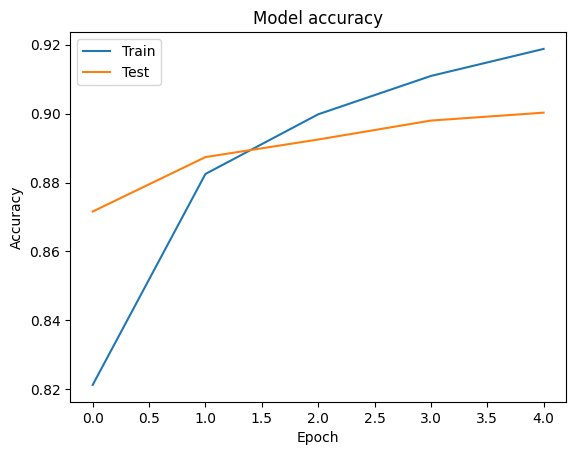

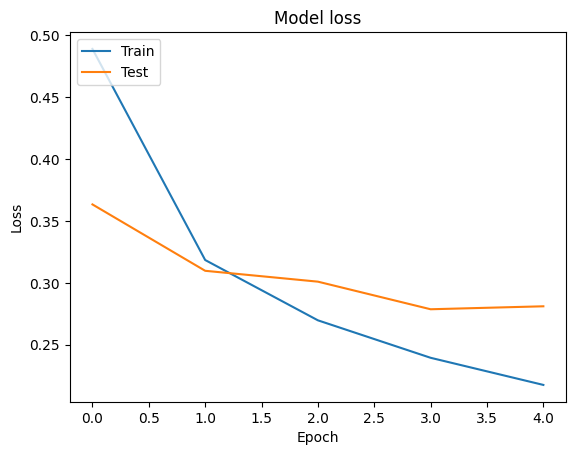

In [16]:
#plot training & validation values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

#plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()


In [17]:
model.save('trained_fashion_mnist_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
